In [1]:
import pandas as pd

# Load the dataset
file_path = '/content/traffic.csv'
traffic_data = pd.read_csv(file_path)

# Display the first few rows
print(traffic_data.head())

# Summary statistics
print(traffic_data.describe())

# Information about the dataset
print(traffic_data.info())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041
           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junct

In [6]:
# Convert datetime columns if necessary
# Assuming 'date_column' is the name of the datetime column, replace it with actual column name
if 'date_column' in traffic_data.columns:
    traffic_data['date_column'] = pd.to_datetime(traffic_data['date_column'])

# Check for missing values
missing_values = traffic_data.isnull().sum()
print("Missing values before cleaning:")
print(missing_values)

# Drop duplicates
traffic_data = traffic_data.drop_duplicates()

# Handling missing values for numeric columns only
numeric_columns = traffic_data.select_dtypes(include=['float64', 'int64']).columns
traffic_data[numeric_columns] = traffic_data[numeric_columns].fillna(traffic_data[numeric_columns].median())

# Verify changes
print("Missing values after cleaning:")
print(traffic_data.isnull().sum())

# Information about the dataset
print(traffic_data.info())


Missing values before cleaning:
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
Missing values after cleaning:
DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


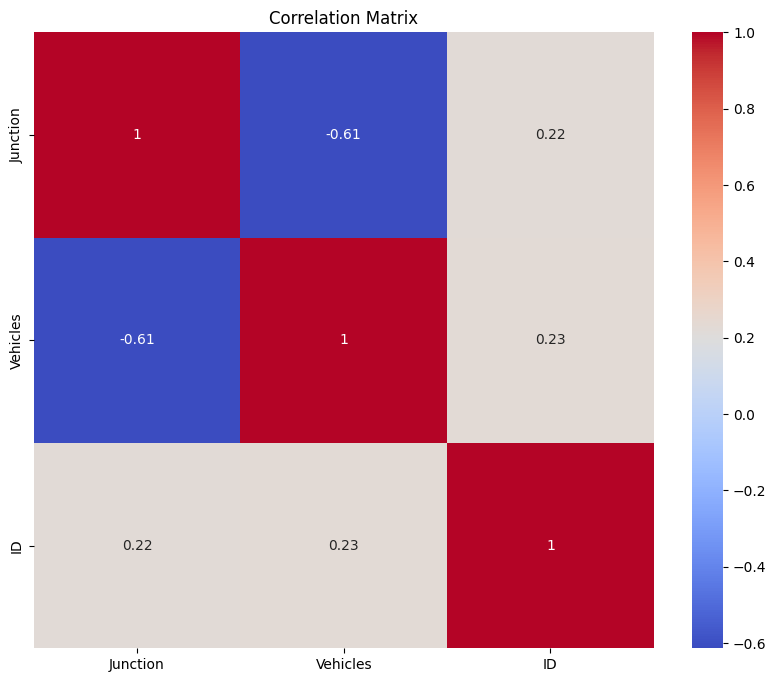

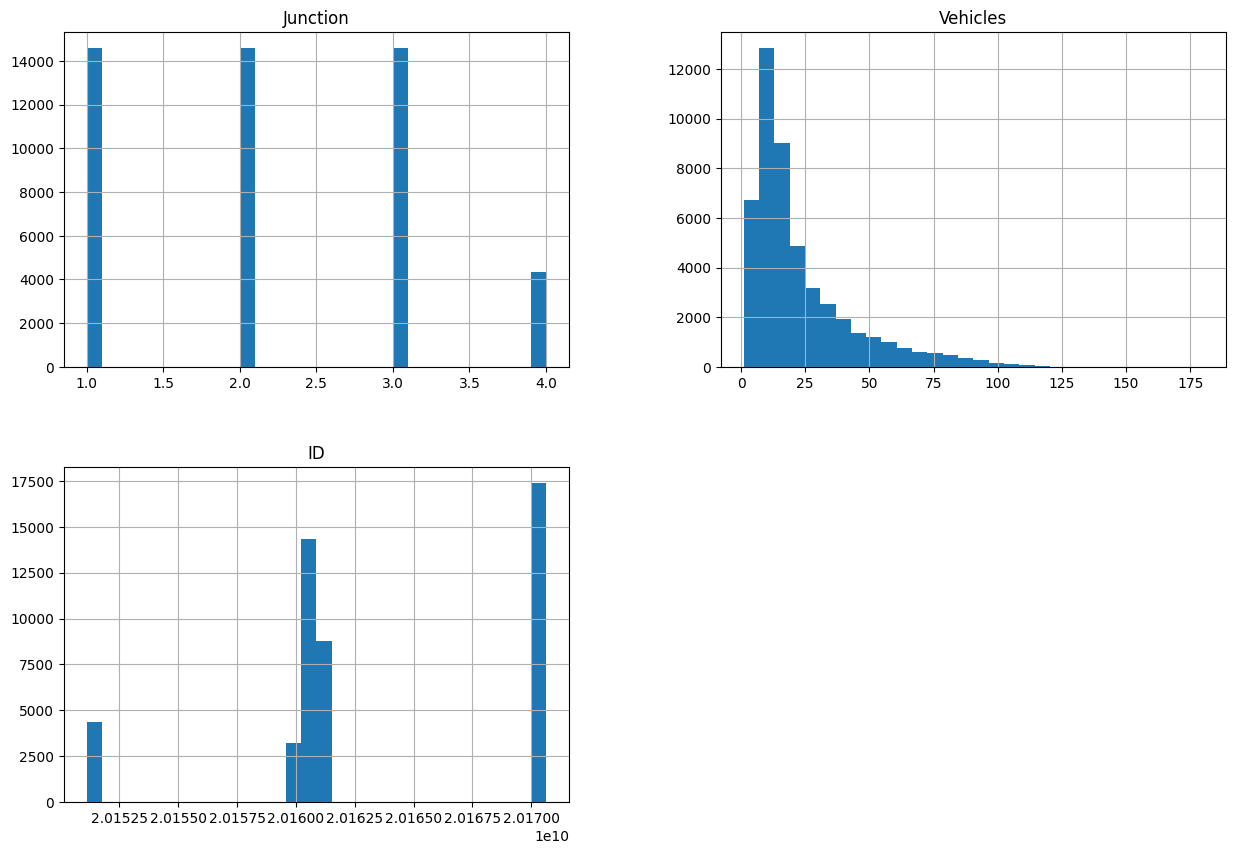

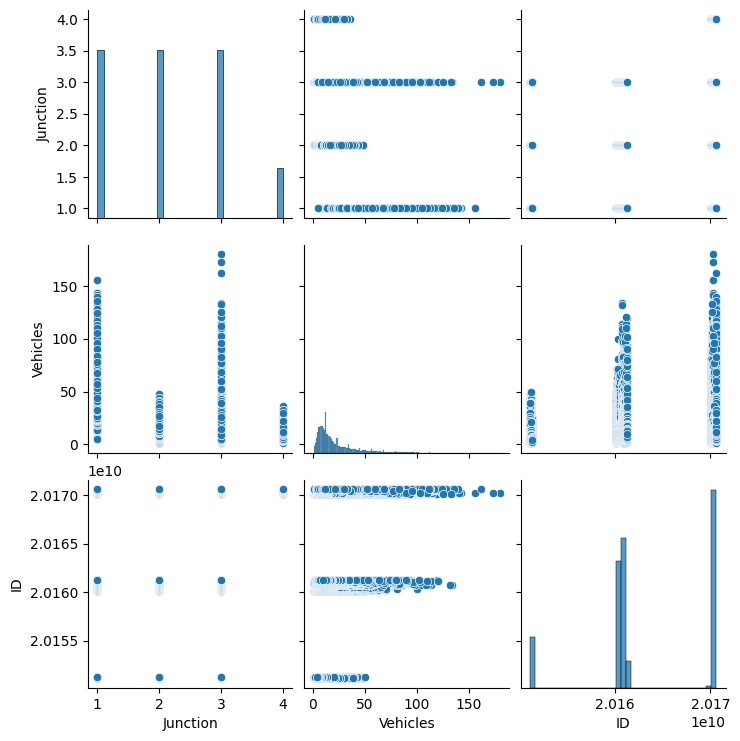

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract numeric data for correlation matrix
numeric_data = traffic_data.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of key variables
numeric_data.hist(bins=30, figsize=(15, 10))
plt.show()

# Pairplot to see relationships
sns.pairplot(numeric_data)
plt.show()


In [16]:
# Convert 'DateTime' to datetime
traffic_data['DateTime'] = pd.to_datetime(traffic_data['DateTime'])


In [17]:
# Assuming the dataset contains data for four junctions
junctions = traffic_data['Junction'].unique()
print("Junctions:", junctions)

# Create DataFrames for each junction
df1 = traffic_data[traffic_data['Junction'] == junctions[0]].copy()
df2 = traffic_data[traffic_data['Junction'] == junctions[1]].copy()
df3 = traffic_data[traffic_data['Junction'] == junctions[2]].copy()
df4 = traffic_data[traffic_data['Junction'] == junctions[3]].copy()

# Verify the separation
print(f"Data for Junction {junctions[0]}:\n", df1.head(), "\n")
print(f"Data for Junction {junctions[1]}:\n", df2.head(), "\n")
print(f"Data for Junction {junctions[2]}:\n", df3.head(), "\n")
print(f"Data for Junction {junctions[3]}:\n", df4.head(), "\n")


Junctions: [1 2 3 4]
Data for Junction 1:
              DateTime  Junction  Vehicles           ID
0 2015-11-01 00:00:00         1 -0.375489  20151101001
1 2015-11-01 01:00:00         1 -0.471875  20151101011
2 2015-11-01 02:00:00         1 -0.616454  20151101021
3 2015-11-01 03:00:00         1 -0.761034  20151101031
4 2015-11-01 04:00:00         1 -0.664648  20151101041 

Data for Junction 2:
                  DateTime  Junction  Vehicles           ID
14592 2015-11-01 00:00:00         2 -0.809227  20151101002
14593 2015-11-01 01:00:00         2 -0.809227  20151101012
14594 2015-11-01 02:00:00         2 -0.857420  20151101022
14595 2015-11-01 03:00:00         2 -0.809227  20151101032
14596 2015-11-01 04:00:00         2 -0.761034  20151101042 

Data for Junction 3:
                  DateTime  Junction  Vehicles           ID
29184 2015-11-01 00:00:00         3 -0.664648  20151101003
29185 2015-11-01 01:00:00         3 -0.761034  20151101013
29186 2015-11-01 02:00:00         3 -0.857420  2

In [18]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Apply standardization to the 'Vehicles' column in each DataFrame
df1['Vehicles'] = scaler.fit_transform(df1[['Vehicles']])
df2['Vehicles'] = scaler.fit_transform(df2[['Vehicles']])
df3['Vehicles'] = scaler.fit_transform(df3[['Vehicles']])
df4['Vehicles'] = scaler.fit_transform(df4[['Vehicles']])


In [29]:
# Function to prepare features and target variable
def prepare_features(df):
    X = df[['Junction']].copy()
    X['Hour'] = df['DateTime'].dt.hour
    X['Day'] = df['DateTime'].dt.day
    X['Month'] = df['DateTime'].dt.month
    y = df['Vehicles']
    return X, y

# Prepare features and target for each junction
X1, y1 = prepare_features(df1)
X2, y2 = prepare_features(df2)
X3, y3 = prepare_features(df3)
X4, y4 = prepare_features(df4)

# Split the data for each junction
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=42)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.2, random_state=42)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)



In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

In [30]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42)
}

# Function to train and evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, y_pred)
        results[name] = {'MSE': mse, 'RMSE': rmse, 'MAE': mae}
    return results

# Evaluate models for each junction
results1 = evaluate_models(models, X_train1, X_test1, y_train1, y_test1)
results2 = evaluate_models(models, X_train2, X_test2, y_train2, y_test2)
results3 = evaluate_models(models, X_train3, X_test3, y_train3, y_test3)
results4 = evaluate_models(models, X_train4, X_test4, y_train4, y_test4)

# Print the results
def print_results(results, junction):
    print(f"Results for Junction {junction}:\n")
    for model, scores in results.items():
        print(f"{model}:\n MSE: {scores['MSE']}\n RMSE: {scores['RMSE']}\n MAE: {scores['MAE']}\n")

print_results(results1, junctions[0])
print_results(results2, junctions[1])
print_results(results3, junctions[2])
print_results(results4, junctions[3])


Results for Junction 1:

Linear Regression:
 MSE: 0.8288085278624014
 RMSE: 0.910389217786767
 MAE: 0.7337169893193917

Random Forest:
 MSE: 1.2463377633347363
 RMSE: 1.1163949853590065
 MAE: 0.9027178463390942

Results for Junction 2:

Linear Regression:
 MSE: 0.8748027521361545
 RMSE: 0.9353089073328419
 MAE: 0.7075194918127814

Random Forest:
 MSE: 1.1764795417946528
 RMSE: 1.084656416472356
 MAE: 0.8353519089739421

Results for Junction 3:

Linear Regression:
 MSE: 0.8390337334864756
 RMSE: 0.915987845708924
 MAE: 0.5965958442214496

Random Forest:
 MSE: 0.8427686185985159
 RMSE: 0.9180243017472446
 MAE: 0.5801605244360755

Results for Junction 4:

Linear Regression:
 MSE: 0.8965726220417235
 RMSE: 0.946875188206832
 MAE: 0.6671791590939876

Random Forest:
 MSE: 0.5978288675027793
 RMSE: 0.7731939391270338
 MAE: 0.5595119334580092

